## IMPORTS

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
from pandas import Series, DataFrame
from sklearn.preprocessing import Imputer
from fancyimpute import KNN

## WORD COUNT

In [3]:
def wordCounter(text):
    cwd = os.getcwd()
    file = open(cwd + '/' + text, 'r')
    
    counter = {}
    for word in file.read().split():
        if word not in counter:
            counter[word] = 1
        else:
            counter[word] += 1
            
    wcDf = Series(counter).to_frame()
    wcDf.columns = ['Count']
    
    return wcDf.sort_values('Count', ascending=False)

## DATA PRE-PROCESSING (SPLIT, MISSING, CLEAN, IMPUTE, QUICK VIZ) 

In [2]:
def splitTarget(data, target):
    targetDf = data[target]
    featuresDf = data.drop(target, axis=1)
    return targetDf, featuresDf

In [4]:
def missingSummary(data):
    total = data.isnull().sum()
    percent = data.isnull().sum() / data.isnull().count() * 100
    missingSumDf = round(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Percent', 
                                                                                              ascending=False),2)
    missingSumDf.index.name = 'Attributes'
    missingSumDf.columns.name = 'Missing Summary'
    
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x="Percent", y=missingSumDf.index, data=missingSumDf)
    plt.title('Missing Data Summary')
    plt.xlabel('Percent Missing (%)')
    plt.ylabel('Attributes')
    plt.show()
    
    return missingSumDf

In [5]:
def cleanedFrame(rawdata, missinngDf, colCutoff, rowCutoff):
    cols2drop = list(missingDf.loc[missingDf['Percent'] >= colCutoff].index)
    rows2drop = list(missingDf.loc[missingDf['Percent'] <= rowCutoff].index)
    
    cleanedDf = rawdata.copy()
    cleanedDf = cleanedDf.drop(cols2drop, axis=1)
    cleanedDf = cleanedDf.dropna(subset=rows2drop, how='any')
    cleanedDf.reindex(np.arange(len(cleanedDf)))
    
    cleaned_missingDf = missingSummary(cleanedDf)
    
    return cleanedDf, cleaned_missingDf

In [44]:
def imputedFrame(data, process):
    if process in ('bfill', 'ffill'):
        imputedDf = data.fillna(method=process, axis=1, inplace=False)
    elif process in ('mean', 'median', 'most_frequent'):
        imp = Imputer(missing_values=np.NaN, strategy=process, axis=0, copy=True)
        imputedDf = imp.fit_transform(data)
        imputedDf = round(DataFrame(imputedDf),0)
    else: 
        nearestNeighbors = int(input('How many nearest Neighbors? '))
        imputedDf = KNN(k=nearestNeighbors).complete(data)
        imputedDf = round(DataFrame(imputedDf),0)
        
    imputedDf.reindex(np.arange(len(imputedDf)))
    imputedDf.columns = data.columns
    
    imputed_missingDf = missingSummary(imputedDf)
    
    return imputedDf, imputed_missingDf      

## QUICK VIZ

In [6]:
def distribution(data):
    cols = list(data.columns)
    for col in cols:
        sns.distplot(data[col], kde=True, rug=True)
        plt.show()

## VALIDATION RUNS

In [7]:
wordCounter('pg11.txt')

,Count
the,1664
and,780
to,773
a,662
of,596
she,484
said,416
in,401
it,356
was,329


In [8]:
df = pd.read_excel('SampleData-2.xls')

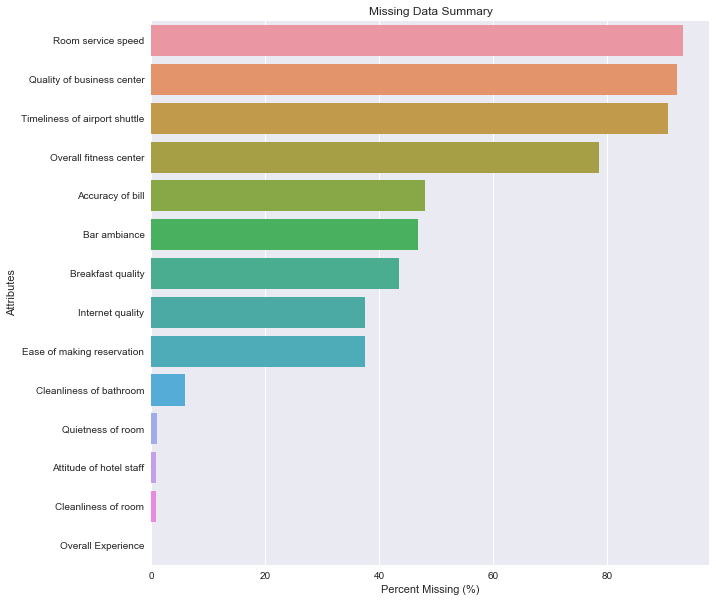

In [9]:
missingDf = missingSummary(df)

In [10]:
missingDf

Missing Summary,Total,Percent
Attributes,,
Room service speed,9338,93.38
Quality of business center,9232,92.32
Timeliness of airport shuttle,9071,90.71
Overall fitness center,7871,78.71
Accuracy of bill,4808,48.08
Bar ambiance,4684,46.84
Breakfast quality,4357,43.57
Internet quality,3744,37.44
Ease of making reservation,3744,37.44


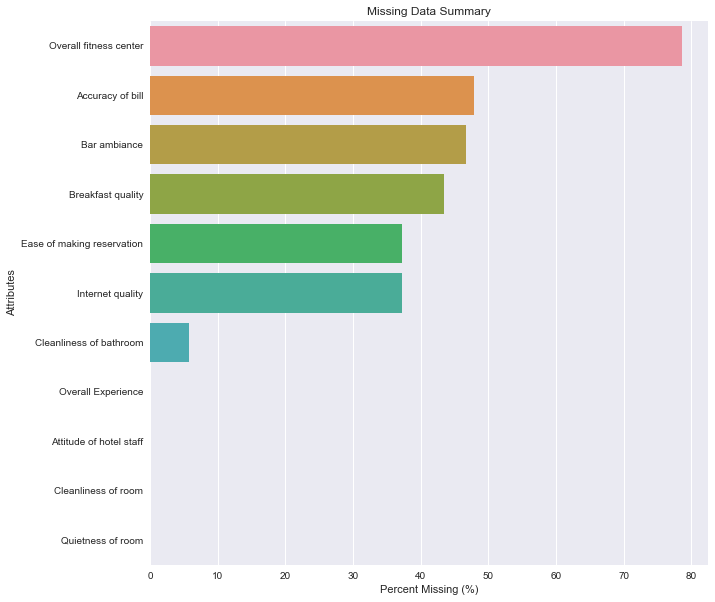

In [11]:
cleanedDf, cleanedMissingDf = cleanedFrame(df, missingDf, 80, 5)

In [12]:
cleanedMissingDf

Missing Summary,Total,Percent
Attributes,,
Overall fitness center,7692,78.57
Accuracy of bill,4686,47.87
Bar ambiance,4566,46.64
Breakfast quality,4254,43.45
Ease of making reservation,3650,37.28
Internet quality,3649,37.27
Cleanliness of bathroom,566,5.78
Overall Experience,0,0.00
Attitude of hotel staff,0,0.00


In [13]:
target, feature =splitTarget(cleanedDf, 'Overall Experience')
feature

,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Overall fitness center
0,10.0,8.0,10.0,10.0,9.0,NaN,10.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0
2,NaN,NaN,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8.0,9.0,9.0,NaN,10.0,3.0,7.0,NaN
4,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN
5,9.0,9.0,9.0,9.0,9.0,NaN,9.0,9.0,9.0,NaN
6,9.0,9.0,7.0,8.0,6.0,9.0,8.0,NaN,NaN,7.0
7,NaN,NaN,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN
8,9.0,9.0,9.0,8.0,8.0,NaN,8.0,NaN,NaN,NaN
9,10.0,10.0,10.0,10.0,10.0,4.0,10.0,4.0,10.0,10.0


In [19]:
cleanedMissingDf

Missing Summary,Total,Percent
Attributes,,
Overall fitness center,7692,78.57
Accuracy of bill,4686,47.87
Bar ambiance,4566,46.64
Breakfast quality,4254,43.45
Ease of making reservation,3650,37.28
Internet quality,3649,37.27
Cleanliness of bathroom,566,5.78
Overall Experience,0,0.00
Attitude of hotel staff,0,0.00


How many nearest Neighbors? 3
Imputing row 1/9790 with 1 missing, elapsed time: 29.655
Imputing row 101/9790 with 4 missing, elapsed time: 29.748
Imputing row 201/9790 with 4 missing, elapsed time: 29.834
Imputing row 301/9790 with 0 missing, elapsed time: 29.932
Imputing row 401/9790 with 1 missing, elapsed time: 30.014
Imputing row 501/9790 with 0 missing, elapsed time: 30.090
Imputing row 601/9790 with 4 missing, elapsed time: 30.163
Imputing row 701/9790 with 0 missing, elapsed time: 30.240
Imputing row 801/9790 with 1 missing, elapsed time: 30.305
Imputing row 901/9790 with 7 missing, elapsed time: 30.367
Imputing row 1001/9790 with 3 missing, elapsed time: 30.436
Imputing row 1101/9790 with 1 missing, elapsed time: 30.500
Imputing row 1201/9790 with 2 missing, elapsed time: 30.565
Imputing row 1301/9790 with 1 missing, elapsed time: 30.672
Imputing row 1401/9790 with 5 missing, elapsed time: 30.788
Imputing row 1501/9790 with 0 missing, elapsed time: 31.056
Imputing row 1601/9790

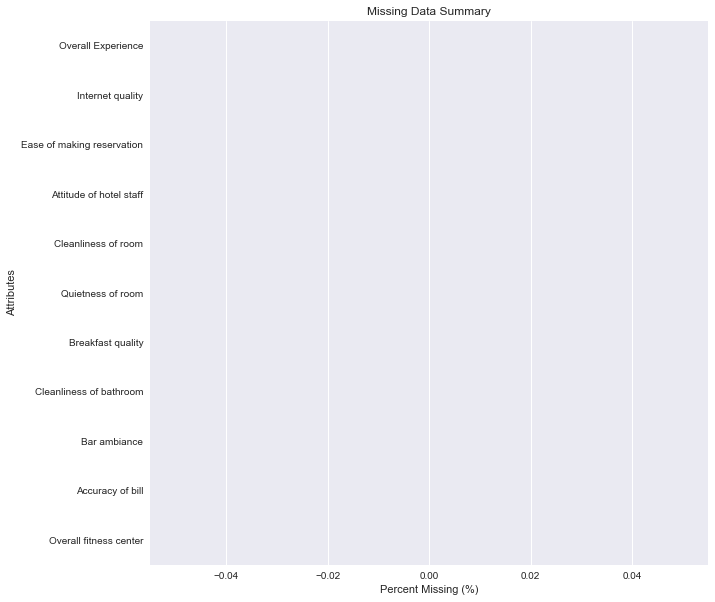

In [45]:
imputedDf, imputed_missingDf = imputedFrame(cleanedDf, 'knn')

In [46]:
imputed_missingDf

Missing Summary,Total,Percent
Attributes,,
Overall Experience,0,0.0
Internet quality,0,0.0
Ease of making reservation,0,0.0
Attitude of hotel staff,0,0.0
Cleanliness of room,0,0.0
Quietness of room,0,0.0
Breakfast quality,0,0.0
Cleanliness of bathroom,0,0.0
Bar ambiance,0,0.0


In [48]:
imputedDf.head()

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Overall fitness center
0,9.0,10.0,8.0,10.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0
2,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0,4.0,6.0,9.0
3,8.0,8.0,9.0,8.0,9.0,9.0,9.0,10.0,3.0,7.0,9.0
4,5.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,9.0


In [53]:
target, features = splitTarget(imputedDf, 'Overall Experience')

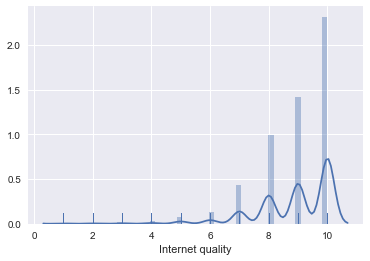

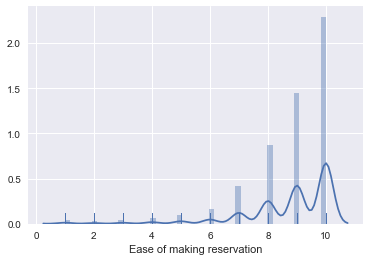

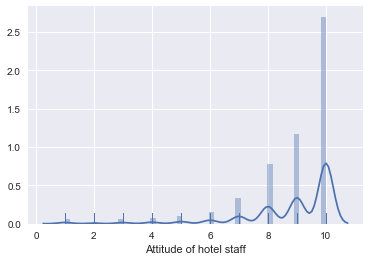

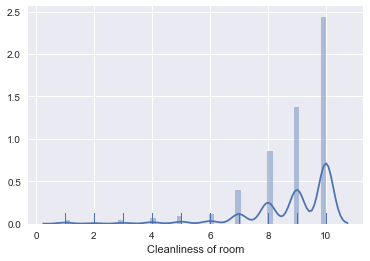

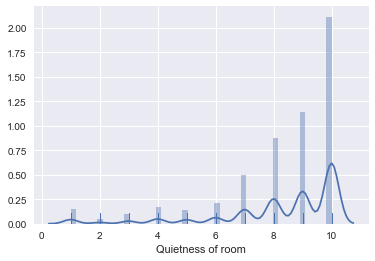

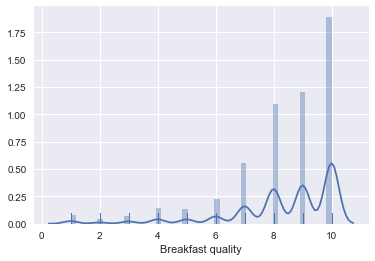

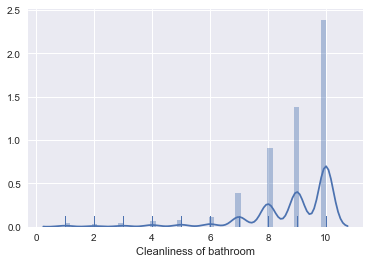

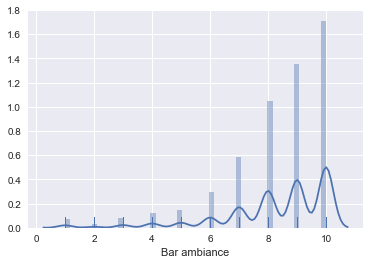

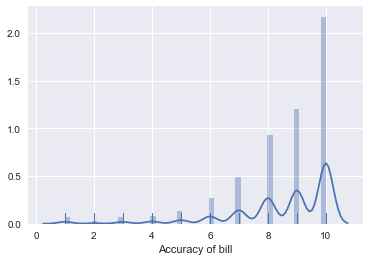

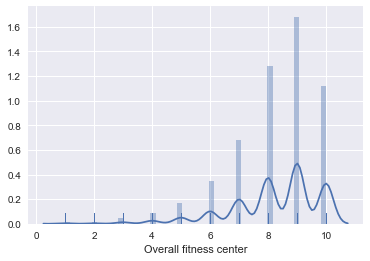

In [54]:
distribution(features)

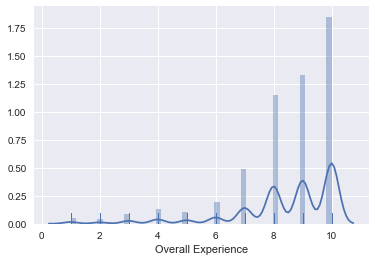

In [57]:
target = DataFrame(target)
distribution(target)

In [62]:
round(cleanedDf.describe(),2)

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Overall fitness center
count,9790.00,6141.00,6140.00,9790.00,9790.00,9790.00,5536.00,9224.00,5224.00,5104.00,2098.00
mean,8.40,8.91,8.81,8.82,8.81,8.28,8.30,8.80,8.29,8.50,8.33
std,1.86,1.36,1.64,1.75,1.64,2.18,2.09,1.63,2.08,2.06,1.82
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
50%,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
75%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [63]:
round(imputedDf.describe(),2)

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Overall fitness center
count,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00
mean,8.40,8.88,8.76,8.82,8.81,8.28,8.33,8.79,8.30,8.51,8.23
std,1.86,1.36,1.62,1.75,1.64,2.18,1.94,1.64,1.87,1.86,1.56
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,7.00
50%,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
75%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,9.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [64]:
round(imputedDf.describe(),2)

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Overall fitness center
count,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00,9790.00
mean,8.40,8.88,8.76,8.82,8.81,8.28,8.33,8.79,8.30,8.51,8.23
std,1.86,1.36,1.62,1.75,1.64,2.18,1.94,1.64,1.87,1.86,1.56
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,7.00
50%,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
75%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,9.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [66]:
DataFrame(imputedDf.var()) - DataFrame(cleanedDf.var())

,0
Overall Experience,0.000000
Internet quality,0.003442
Ease of making reservation,-0.062828
Attitude of hotel staff,0.000000
Cleanliness of room,0.000000
Quietness of room,0.000000
Breakfast quality,-0.609274
Cleanliness of bathroom,0.007894
Bar ambiance,-0.817628
Accuracy of bill,-0.803228
